# Chapter 8 Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [20]:
df = pd.read_csv("../../datasets/dataset_enrollment_sd.csv")
df.tail(3)

,Feature1,Feature2,enrollment_enc,enrollment_cat
60,-11.742422,-45.934048,1,Likely
61,57.926851,-44.738880,2,Very Likely
62,-4.975551,-37.612214,1,Likely


In [4]:
X = pd.DataFrame(df.iloc[:, :2])
y = df["enrollment_cat"].values

In [5]:
X.shape

(63, 2)

In [6]:
len(y)

63

In [7]:
import numpy as np

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None)

In [8]:
clf.score(X, y)

0.9206349206349206

In [9]:
print(clf.predict([[57.69493461, -40.252505304]]))

['Very Likely']


In [10]:
clf.classes_

array(['Likely', 'Unlikely', 'Very Likely'], dtype='<U11')

In [11]:
print(clf.predict_proba([[57.69493461, -40.252505304]]))

[[5.53691926e-03 3.68585395e-09 9.94463077e-01]]


In [12]:
y_pred = clf.predict(X)

### Accuracy Precision & Recall

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

     Likely       0.90      0.86      0.88        21
   Unlikely       0.91      0.95      0.93        21
Very Likely       0.95      0.95      0.95        21

avg / total       0.92      0.92      0.92        63



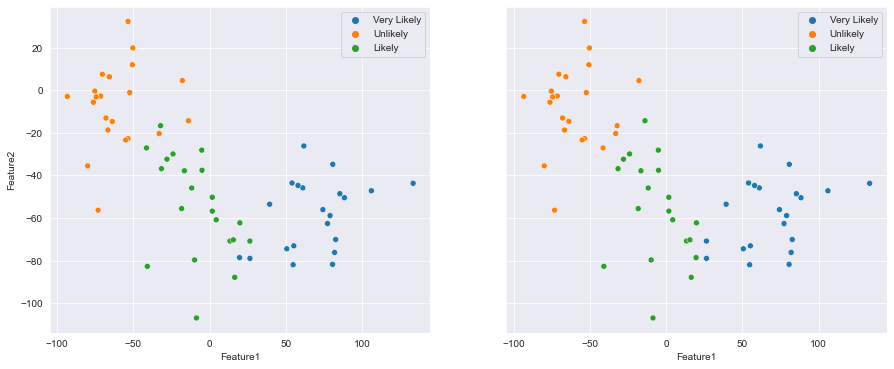

In [14]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
sns.scatterplot(x=df["Feature1"], y=df["Feature2"], hue=y, data=df, ax=axes[0])
sns.scatterplot(x=df["Feature1"], y=df["Feature2"], hue=y_pred, data=df, ax=axes[1]);
plt.savefig("twoscatters.png", dpi=300)

In [21]:
xt=df["Feature1"]
yt=df["Feature2"]

deltaX = (max(xt) - min(xt))/10
deltaY = (max(yt) - min(yt))/10
xmin = min(xt) - deltaX
xmax = max(xt) + deltaX
ymin = min(yt) - deltaY
ymax = max(yt) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-115.919585025 155.98469347499997 -120.85323506600002 46.137404926


In [22]:
import scipy.stats as st


In [23]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([xt, yt])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

### Support Vector Machines:

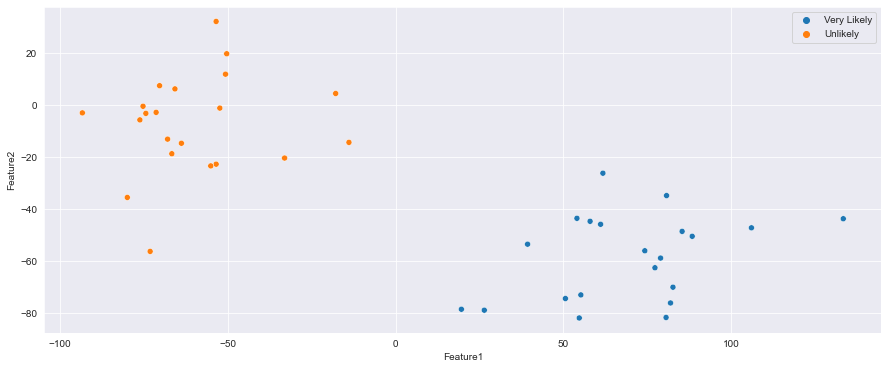

In [25]:
import matplotlib.pyplot as plt

dftmp = df[(df["enrollment_cat"] != "Likely")]


plt.figure(figsize=(15, 6))
sns.scatterplot(x=dftmp["Feature1"], y=dftmp["Feature2"], hue=dftmp["enrollment_cat"].values, data=dftmp)
plt.show()

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


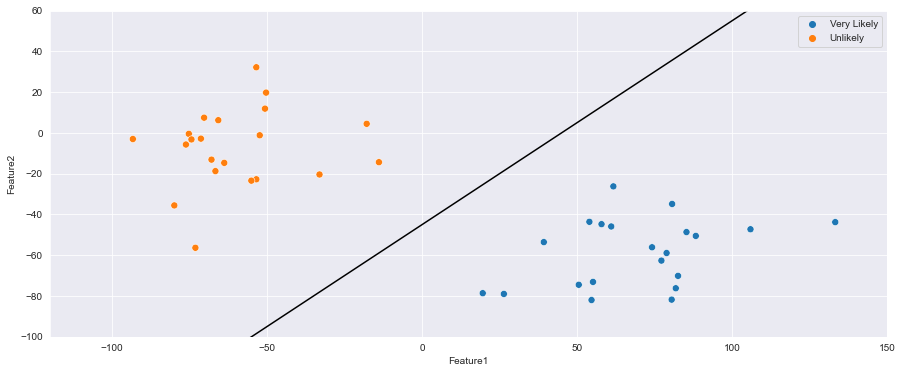

In [26]:
plt.figure(figsize=(15, 6))

xfit = np.linspace(-90, 130)
sns.scatterplot(dftmp["Feature1"], dftmp["Feature2"], hue=dftmp["enrollment_cat"].values, s=50)

for m, b in [(1, -45),]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-120, 150);
plt.ylim(-100, 60);

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


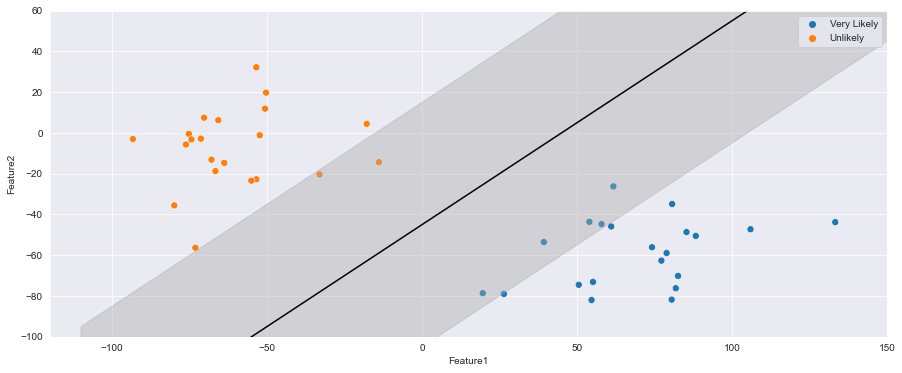

In [27]:
plt.figure(figsize=(15, 6))

xfit = np.linspace(-110, 180)
sns.scatterplot(dftmp["Feature1"], dftmp["Feature2"], hue=dftmp["enrollment_cat"].values, s=50)

for m, b, d in [(1, -45, 60),]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-120, 150);
plt.ylim(-100, 60);

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dftmp[["Feature1", "Feature2"]], 
                                                    dftmp["enrollment_cat"].values, 
                                                    test_size = 0.25)

In [37]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1, random_state = 42)
model.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
model.score(X_test, y_test)

1.0

In [31]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


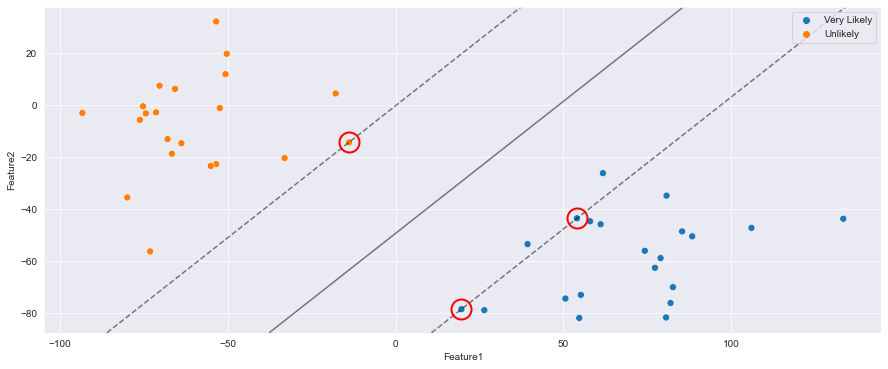

In [32]:
plt.figure(figsize=(15, 6))

sns.scatterplot(dftmp["Feature1"], dftmp["Feature2"], hue=dftmp["enrollment_cat"].values, s=50)

plot_svc_decision_function(model);

for j, k in model.support_vectors_:
    plt.plot([j], [k], lw=0, marker='o', color='red', markeredgewidth=2, markersize=20, fillstyle='none')



In [33]:
model.support_vectors_

array([[-13.87769442, -14.34750288],
       [ 54.01359285, -43.58903945],
       [ 19.6064147 , -78.60216536]])

In [34]:
for j, k in model.support_vectors_:
    print(j)
    print(k)

-13.87769442
-14.34750288
54.01359285
-43.58903945
19.6064147
-78.60216536


In [35]:
df

,Feature1,Feature2,enrollment_enc,enrollment_cat
0,80.697444,-34.832905,2,Very Likely
1,-53.423312,-22.736584,0,Unlikely
2,-50.639987,11.923637,0,Unlikely
3,-41.346903,-27.126203,1,Likely
4,-70.273574,7.487521,0,Unlikely
...,...,...,...,...
58,77.244307,-62.619328,2,Very Likely
59,50.582194,-74.472417,2,Very Likely
60,-11.742422,-45.934048,1,Likely
61,57.926851,-44.738880,2,Very Likely


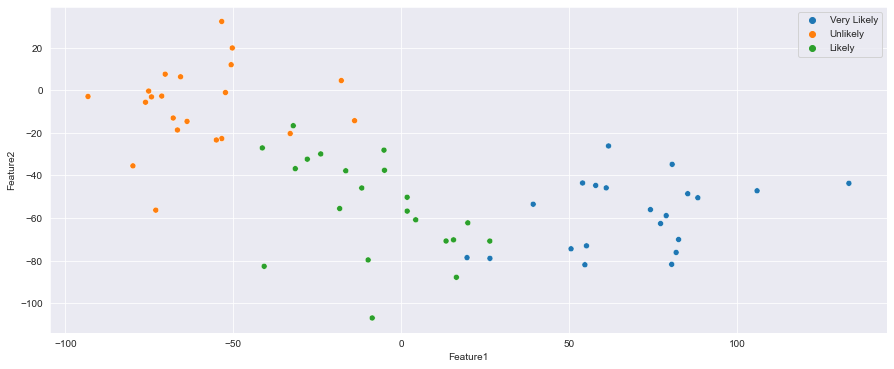

In [36]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df["Feature1"], y=df["Feature2"], hue=df["enrollment_cat"].values, data=df)
plt.show()